In [1]:
# import needed libraries
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

# path of local project
import rvesimulator

In [2]:
from rvesimulator.benchmark_master_functions.two_materials_sve import VonMisesPlasticElasticRegularLoads

2023-07-24 11:49:03,907 - Imported f3dasm (version: 1.2.0)


In [7]:
samples = {"youngs_modulus_matrix": 200.0, "poisson_ratio_matrix": 0.3}

In [8]:
def plot_results(results, sample):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
    ax[0].plot(
        results["strain"][:, 0, 0],
        results["stress"][:, 0, 0],
        label=f'E= {sample["youngs_modulus_matrix"]:.2f}, v= {sample["poisson_ratio_matrix"]:.2f}',
    )
    ax[0].legend()
    ax[0].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
    ax[1].plot(
        results["strain"][:, 1, 1],
        results["stress"][:, 1, 1],
        label=f'E= {sample["youngs_modulus_matrix"]:.2f}, v= {sample["poisson_ratio_matrix"]:.2f}',
    )
    ax[1].legend()
    ax[1].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
    ax[2].plot(
        results["strain"][:, 1, 0],
        results["stress"][:, 1, 0],
        label=f'E= {sample["youngs_modulus_matrix"]:.2f}, v= {sample["poisson_ratio_matrix"]:.2f}',
    )

    ax[2].legend()
    ax[2].set(**pparam)

In [9]:
von_mises_case = VonMisesPlasticElasticRegularLoads()
von_mises_case.update_sim_info(sve_geometry_benchmark="task5", radius=0.1, strain=[
                               0.05, 0.00, 0.00], yield_stress=0.5, a=0.2, b=0.4, num_cpu=6, print_info=True)

Simulation information: 

{
    "job_name": "two_materials_sve",
    "size": 1.0,
    "location_information": [
        [
            0.5,
            0.5,
            0.2,
            1
        ]
    ],
    "youngs_modulus_matrix": 100.0,
    "poisson_ratio_matrix": 0.3,
    "hardening_law": "swift",
    "hardening_paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "youngs_modulus_fiber": 1.0,
    "poisson_ratio_fiber": 0.19,
    "mesh_partition": 30,
    "strain": [
        0.05,
        0.0,
        0.0
    ],
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}


In [10]:
results_von_mises = von_mises_case.run_simulation(
    sample=samples, third_folder_index=0)

/home/jiaxiangyi/Documents/rvesimulator/tutorials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<13 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.003491 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


KeyError: 1

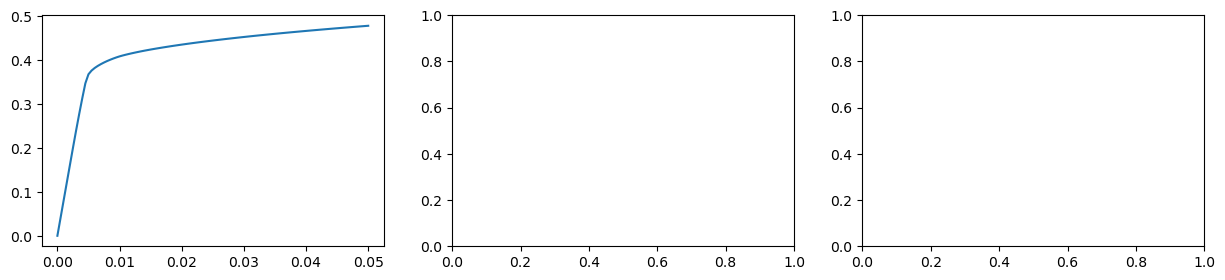

In [7]:
plot_results(results_von_mises, sample=samples)

In [ ]:
from rvesimulator.additions.ampitudesampler import AmplitudeGenerator
from rvesimulator.benchmark_master_functions.two_materials_sve import VonMisesPlasticElasticPathLoads

In [ ]:

# create the doe
num_amplitude = 2
path_sampler = AmplitudeGenerator(num_dim=3)
paths = path_sampler.get_amplitude(
    num_amplitude=2,
    num_control=8,
    num_steps=100,
    arg_name="strain_amplitude",
    seed=1,
)

samples_dict = paths.to_dict("records")
print(paths)

In [ ]:

path_dependent_problem = VonMisesPlasticElasticPathLoads()
path_dependent_problem.update_sim_info(
    strain=[0.02, 0.02, 0.02], yield_stress=0.5, a=0.2, b=0.4, num_cpu=6, print_info=True)

In [ ]:
path_dependent_results = {}
# calculate the initial responses of simulation
for ii in range(len(samples_dict)):
    path_dependent_results[ii] = path_dependent_problem.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii)

In [ ]:
def plot_path_dependent(results, index):
    fig, ax = plt.subplots(2, 3, figsize=(16, 8))
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
    ax[0, 0].plot(
        results[index]["strain"][:, 0, 0],
    )
    ax[0, 0].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
    ax[0, 1].plot(
        results[index]["strain"][:, 0, 1],
    )
    ax[0, 1].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
    ax[0, 2].plot(
        results[index]["strain"][:, 1, 1],
    )
    ax[0, 2].set(**pparam)

    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
    ax[1, 0].plot(
        results[index]["stress"][:, 0, 0],
    )
    ax[1, 0].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
    ax[1, 1].plot(
        results[index]["stress"][:, 0, 1],
    )
    ax[1, 1].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
    ax[1, 2].plot(
        results[index]["stress"][:, 1, 1],

    )
    plt.show()

In [ ]:
plot_path_dependent(path_dependent_results, 1)
# path_dependent_results.keys()